o 하루단위로 변환한 후 결측치 50%이상인 feature 제거하여 상관관계를 보도록 하자  
-> 제주, 고산, 성산, 서귀포 지역 선정  
o label data shift해서 상관관계 보자  
x 하루단위로 변환할때 시간대도 바꿔가면서 변환하자  
x 평균, max, min, 누적 모두 해보자  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv('data/weather_v1.csv')
label = pd.read_csv('data/target_v1.csv')
area = pd.read_csv('data/lookupTable_area.csv')

notQC_col = [i for i in train.columns if 'QCFlag' not in i]
train = train[notQC_col]

area = area.iloc[:4]
train = train.iloc[:70063]

/home/suna/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
def area_shift_corr(area_num,day_later):
    areaDF = train[train['area']==area_num]
    areaDF['date'] = pd.to_datetime(areaDF['datetime'], format='%Y-%m-%d', errors='raise').dt.date
    areaDF = areaDF.groupby(areaDF['date']).mean()
    msv_ration = areaDF.isna().sum()/len(areaDF)
    drop_x = ['area']
    for feature, ratio in zip(msv_ration.index,msv_ration):
        if ratio>=0.5:
            drop_x.append(feature)
            
    areaDF = areaDF.drop(drop_x,axis=1)
    

    label['date'] = pd.to_datetime(label['date'], format='%Y-%m-%d', errors='raise').dt.date
    label.index = label['date']
    label_ = label.shift(-day_later)
    condf = pd.concat([areaDF,label_],axis=1)

    return condf.corr()

In [12]:
def corr_shift_bar(area_num,day_later):
    plt.figure(figsize=(15, 3))
    plt.bar(np.arange(len(area_shift_corr(area_num,day_later).index[:-4])), list(area_shift_corr(area_num,day_later)['smp_max'])[:-4])
    plt.ylabel('smp_max')
    
    plt.show()  
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_shift_corr(area_num,day_later).index[:-4])), list(area_shift_corr(area_num,day_later)['smp_min'])[:-4])
    plt.ylabel('smp_min')
    
    plt.show()    
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_shift_corr(area_num,day_later).index[:-4])), list(area_shift_corr(area_num,day_later)['smp_mean'])[:-4])
    plt.ylabel('smp_mean')
    
    plt.show()    
    
    plt.figure(figsize=(20, 3))
    plt.bar(np.arange(len(area_shift_corr(area_num,day_later).index[:-4])), list(area_shift_corr(area_num,day_later)['supply'])[:-4])
    
    plt.xlabel('Feature')
    plt.ylabel('supply')
    plt.xticks(np.arange(len(area_shift_corr(area_num,day_later).index[:-4])),area_shift_corr(area_num,day_later).index,fontsize=15, rotation=90)
    plt.show()

/home/suna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


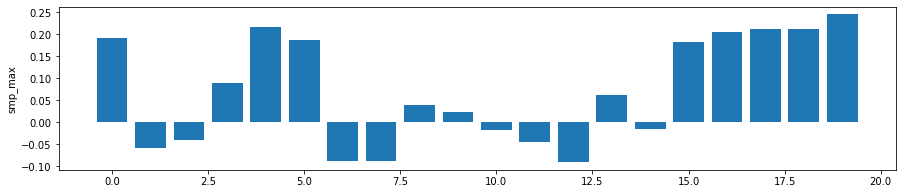

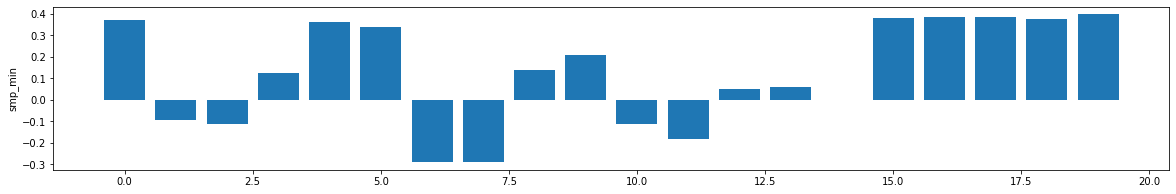

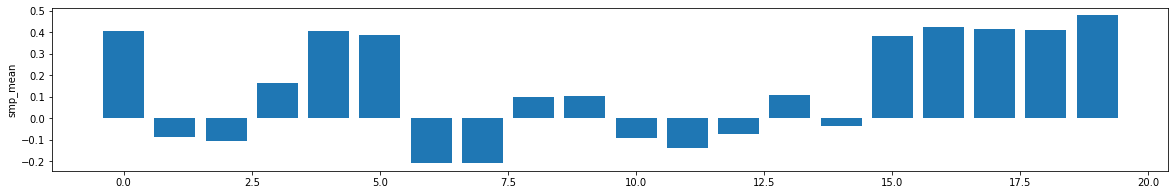

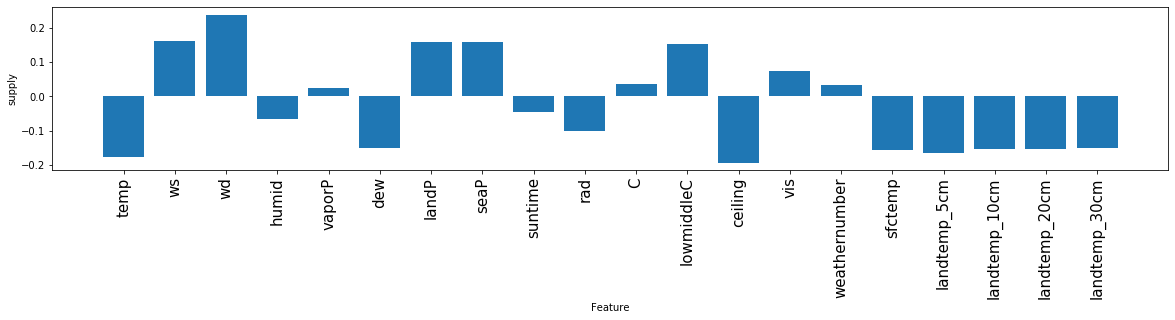

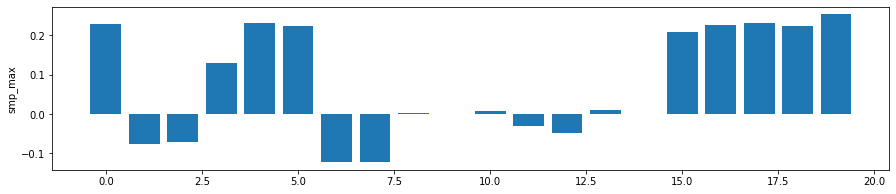

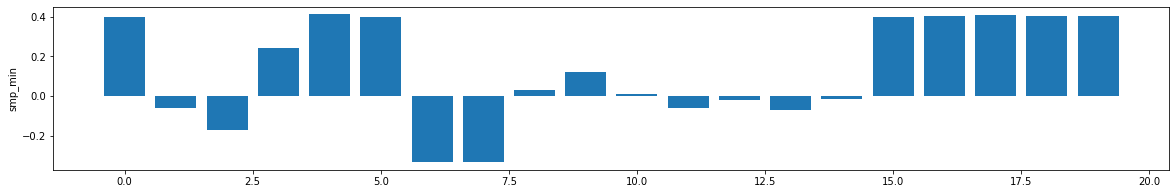

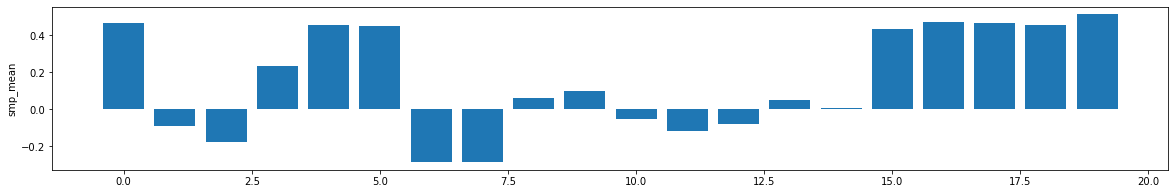

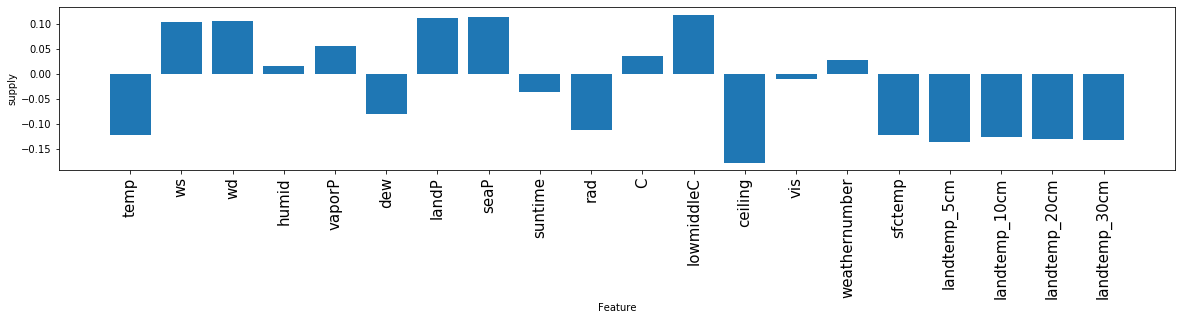

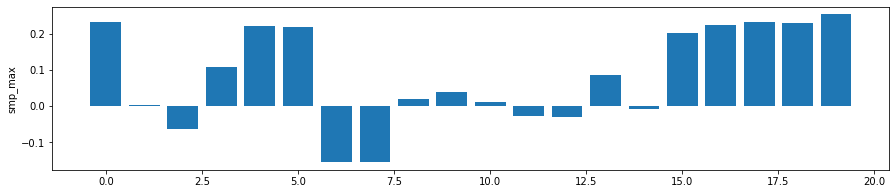

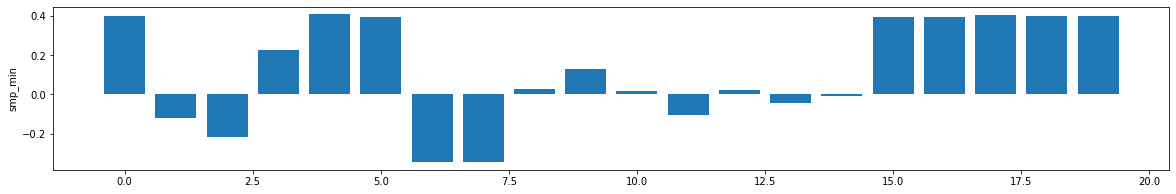

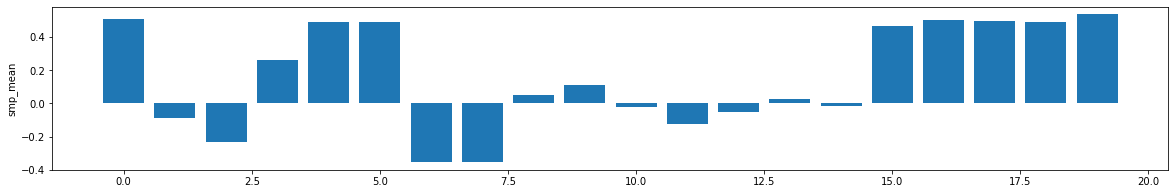

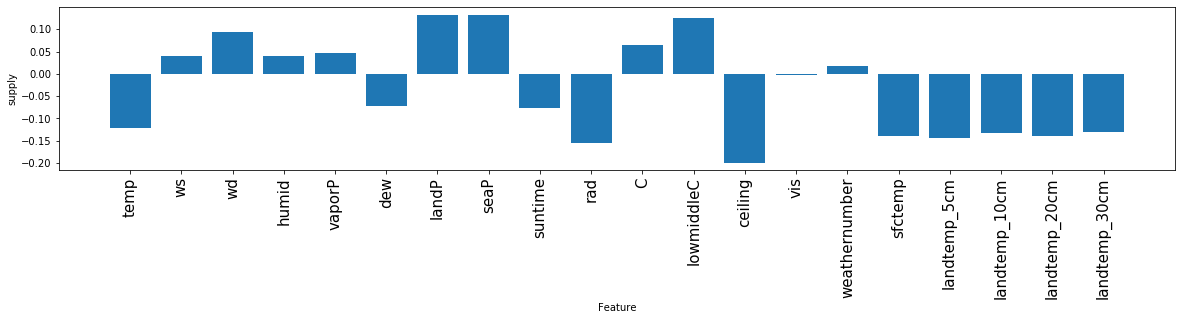

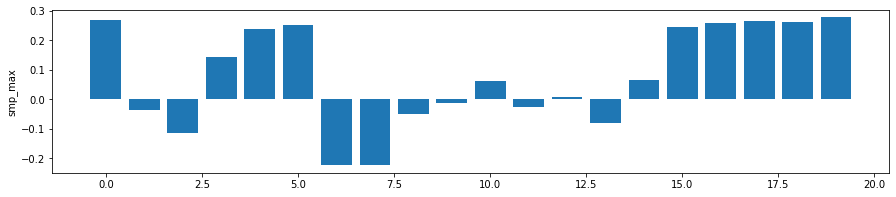

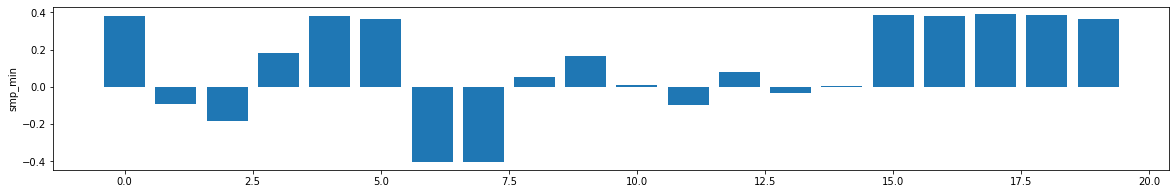

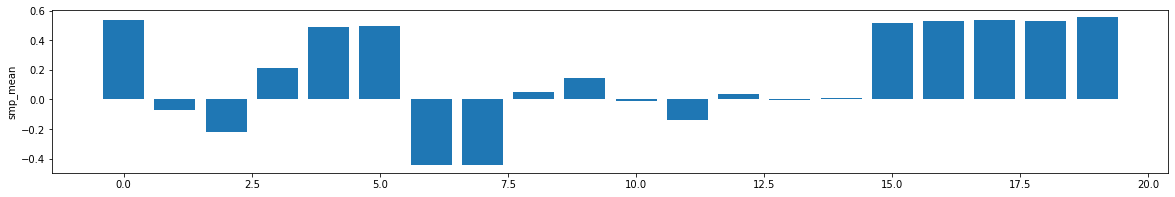

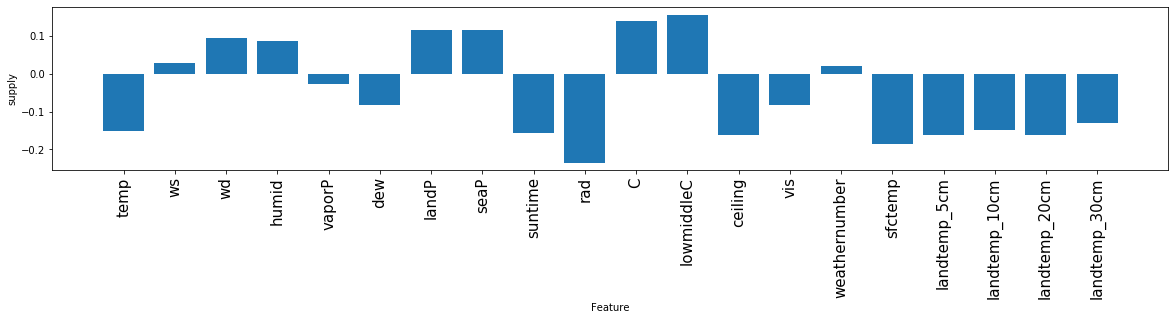

In [17]:
corr_shift_bar(184,0)
corr_shift_bar(184,7)
corr_shift_bar(184,15)
corr_shift_bar(184,30)